이번 실습은 사용자 정의 함수와 for문, numpy 모듈과 matplotlib 모듈을 이용하여 주어진 급수를 계산하고, 그 결과와 오차값을 그래프를 통해 표현하는 것을 목표로 한다.


# Problem 1.

(1) 사용자 정의함수를 이용해 팩토리얼을 계산하는 함수를 만드세요. [20 pts]

In [ ]:
def factorial(i):
    if(i > 1):
        return i * factorial(i - 1)
    else:
        return 1


위의 코드는 재귀함수를 활용하여 정수 i의 팩토리얼을 표현한 사용자 정의 함수이다. 변수 i의 값이 1보다 작거나 같을 때는 재귀 호출을 하지 않고 1을 반환하고, 1보다 큰 수를 입력받으면 i * factorial(i-1)의 과정을 통해 i-1에 대한 팩토리얼 값을 계산해 이를 i에 곱하는 방식으로 계속해서 팩토리얼의 값을 계산해 나간다. 이후 i가 1이 되면 더 이상 재귀 호출이 일어나지 않고, 함수는 계산값을 반환한다.

(2) 사용자 정의함수를 이용해 테일러 급수를 계산하는 계산하는 함수를 만드세요. [20 pts]

In [ ]:
def taylor_exp(x, n):
  start = 1
  for i in range(1, n+1):
    start += x**i/factorial(i)
  return start


위의 코드는 앞에서 정의한 팩토리얼 함수를 활용하여 테일러 급수를 계산하는 사용자 정의 함수이다.
테일러 급수에서 지수함수 $e^{x}$는 다음과 같은 무한급수로 표현된다. $$
e^x \approx 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

본 함수는 변수 x와 n을 입력받아 주어진 숫자 x에 대한 n차 테일러 급수를 이용해 지수함수 $e^{x}$의 근사값을 계산한다.

(3) 계산 결과를 그래프로 그리세요. [30 pts]

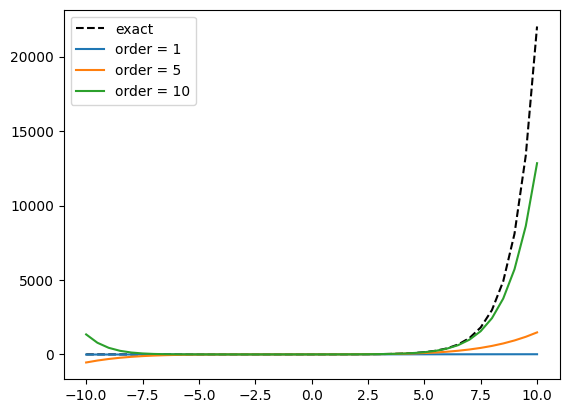

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

start = -10; end = 10; dx = 0.5
x = np.arange(start, end+dx, dx)
plt.plot(x, np.exp(x), 'k--', label = 'exact')

for order in [1, 5, 10]:
  plt.plot(x, taylor_exp(x, order), label = f'order = {order}')

plt.legend()
plt.show()


numpy 모듈과 matplotlib 모듈 및 (1), (2)번에서 정의한 사용자 정의함수를 통해 다양한 차수의 테일러 급수 근사를 실제 $y=e^{x}$ 함수와 비교해 보았다. $-10 \leq x \leq 10$의 범위에서 그래프를 작성하였으며, 원함수인 $y=e^{x}$ 그래프를 점선으로 표현하였고, 차수가 1, 5, 10인 테일러 급수의 전갯값을 각각 파랑, 주황, 초록색 그래프로 나타내었다. \\
그래프의 개형을 살펴보면 초록, 주황, 파랑의 순서대로 $y=e^{x}$ 그래프와 유사한 개형을 띈다는 사실을 알 수 있다. 이는 곧 테일러 급수의 차수(order)가 높아질 수록 원래의 함수값과의 오차가 줄어든다는 사실을 의미한다.

(4) 위 결과에 대한 Error(x) 그래프를 그리세요. [30 pts]

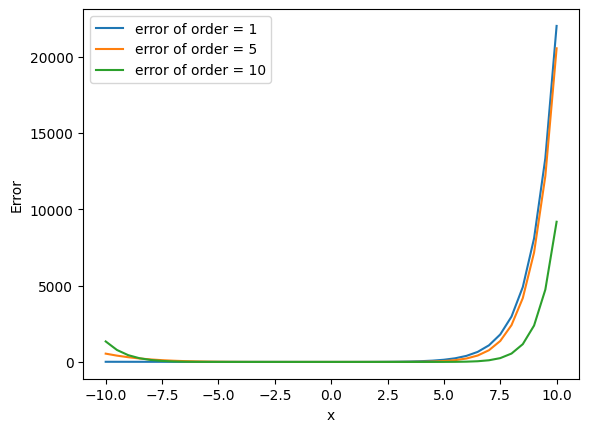

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

start = -10; end = 10; dx = 0.5
x = np.arange(start, end+dx, dx)

for order in [1, 5, 10]:
  plt.plot(x, abs(np.exp(x)-taylor_exp(x, order)), label = f'error of order = {order}')

plt.xlabel("x")
plt.ylabel("Error")

plt.legend()
plt.show()

위 코드는 테일러 급수의 근삿값와 원함수 $y=e^{x}$의 오차를 계산하고, 그 결과를 시각화한 코드이다.

```
abs(np.exp(x) - taylor_exp(x, order))
```
코드를 활용해 정확한 지수 함수 $e^{x}$ 값과 각 order 차수에 해당하는 테일러 급수 근사값 사이의 절댓값 오차를 계산하였다. \\
위의 그래프는 x축 값에 따른 테일러 급수 근사와 실제 함수 사이의 오차를 시각화하여 보여준다. 위 그래프를 통해 차수가 낮을수록 원함수와 테일러 급수의 근사값의 오차가 크게 나타난다는 사실을 알 수 있으며, 차수가 높아질수록 오차값이 감소하는 모습을 확인할 수 있다.

# Problem 2.

$f(x) = \sin(𝑥) − 0.5 = 0$ \\

위 방정식의 근을 찾으세요. \\
(1) Bisection method를 이용하세요. [50 pts]
- 반복 횟수에 따른 근의 수렴과정과 오차를 그리세요.

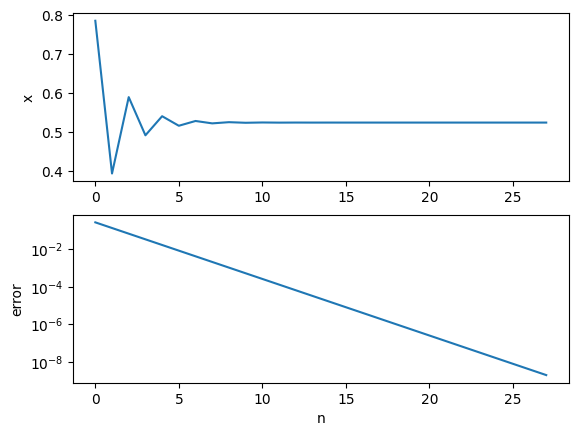

In [ ]:
import numpy as np, matplotlib.pyplot as plt

eps = 1E-8
ans = np.arcsin(0.5)

def f(x):
  return np.sin(x)-0.5

steps = []
x3_list = []
error_list = []
x1=0; x2 = np.pi/2.0
step = 0

while ((x2-x1)>eps):
  x3=(x1+x2)/2.0
  if f(x1)*f(x3)<0.0:
    x2=x3
  else:
    x1=x3

  steps.append(step)
  x3_list.append(x3)
  step += 1

for i in x3_list:
  error = abs(i - ans)
  error_list.append(error)

plt.subplot(211)
plt.plot(steps, x3_list)
plt.ylabel("x")

plt.subplot(212)
plt.plot(steps, error_list)
plt.xlabel("n")
plt.ylabel("error")
plt.yscale('log')

plt.show()

위 코드는 **이분법(Bisection Method)**을 활용해 방정식
$\sin(x)=0.5$ 의 근을 찾고, 그 과정에서의 x값 변화와 오차를 그래프로 시각화한 코드이다. \\
이분법의 경우 오차 허용범위에 따라 찾게될 근의 정확도가 결정된다. 본 코드에서는 오차 허용범위를 나타내는 변수 eps의 값을 $10^{-8}$으로 설정하였다. 변수 ans는 $\sin(x)=0.5$의 정확한 해를 저장한다. \\
함수 $f(x)$는  $\sin(x)-0.5$로 정의하였으며, 이후의 코드를 통해 이 함수의 근을 이분법으로 찾게된다.
리스트 steps는 각 이분법 단계의 인덱스를 저장하는 리스트이며, 리스트 x3_list는 각 단계에서 구해진 근의 값을 저장하는 리스트이다. \\
임의의 함수의 근을 찾기위해 이분법을 사용하는 경우 $f(x_1)f(x_2) < 0$인 임의의 $x_1$과 $x_2$를 정해야하는데, 본 코드에선 x1=0, x2=$\pi/2$로 지정하였다. \\
이후 while문 루프를 통해 x2와 x1의 차가 오차 허용범위 eps보다 작아질 때까지 이분법 과정을 반복하고, 그 중간값 x3를 x3_list에 저장하며, step을 1씩 증가시키도록 하였다. \\
이후 for문을 통해 x3들과 실제 해 ans 간의 절댓값 오차를 계산해 error_list에 저장하도록 구성하였다. \\

위 그래프의 결과를 통해 이분법(Binary Method)를 통해 $f(x)$의 해를 구하는 과정에서는 약 25번의 시행을 거쳐야 원하는 정확도의 근이 도출된다는 사실을 알 수 있었다.

(2) Newton’s method를 이용하세요. [50 pts]
- 반복 횟수에 따른 근의 수렴과정과 오차를 그리세요.

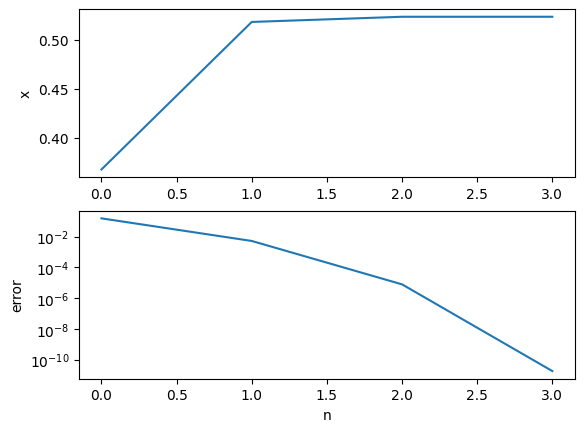

In [ ]:
import numpy as np, matplotlib.pyplot as plt

eps = 1E-8
ans = np.arcsin(0.5)

def f(x):
  return np.sin(x)-0.5

def df(x):
  return (f(x+eps)-f(x))/eps

x = 1
steps = []
x_list = []
error_list = []
step = 0

while(np.abs(f(x)) > eps):
  x -= f(x)/df(x)

  steps.append(step)
  x_list.append(x)
  step += 1

for i in x_list:
  error = abs(i - ans)
  error_list.append(error)

plt.subplot(211)
plt.plot(steps, x_list)
plt.ylabel("x")

plt.subplot(212)
plt.plot(steps, error_list)
plt.xlabel("n")
plt.ylabel("error")
plt.yscale('log')

plt.show()

위 코드는 **뉴턴 방법(Newton's Method)**을 활용해 방정식
$\sin(x)=0.5$ 의 근을 찾고, 그 과정에서의 x값 변화와 오차를 그래프로 시각화한 코드이다. \\
뉴턴 방법의 경우 $f(x_n)$의 절댓값 크기에 따라 찾게될 근의 정확도가 결정된다. 본 코드에서는 함수의 절댓값의 크기를 나타내는 변수 eps의 값을 $10^{-8}$으로 설정하였다. 변수 ans는 $\sin(x)=0.5$의 정확한 해를 저장한다. \\

함수 $f(x)$는 $\sin(x)-0.5$로 정의하였으며, 이후의 코드를 통해 이 함수의 근을 뉴턴 방법으로 찾게된다. \\

함수 $df(x)$는 뉴턴-랩슨 방법의 공식에 필요한 $f(x)$의 도함수 $f^{'}(x)$를 의미한다. 본 함수에서는 미리 선언해놓은 변수 eps를 이용해 수치적으로 도함수를 구하도록 하였다. \\

변수 x는 뉴턴 방법의 초기 시작 추정값을 의미한다. 본 코드에서는 x=1로 정의하였다.
리스트 steps는 각 단계의 인덱스를 저장하는 리스트이며, 리스트 x_list는 각 단계에서 계산된 근의 값을 저장하는 리스트이다. \\

이후 while문 루프를 통해 함수 값 $f(x)$의 절댓값이 eps보다 작아질 때까지 뉴턴 방법을 반복하도록 하였다.

```
x -= f(x)/df(x)
```
는 뉴턴 방법의 기본 수식인 $x_{n+1} = x_n - f(x_n) / f^{ '}(x_n) $을 의미한다. \\
각 단계에서 x 값을 업데이트한 후, 그 값을 x_list에 저장하고, steps 리스트에 반복 횟수를 기록하도록 구성하였다. \\
이후 for문을 통해 이전 과정에서 구한 x값 들과 실제 해 ans 간의 절댓값 오차를 계산해 error_list에 저장하도록 구성하였다. \\



위 그래프의 결과를 통해 뉴턴 방법(Newton's Method)를 통해 $f(x)$의 해를 구하는 과정에서는 약 3번의 시행을 거쳐야 원하는 정확도의 근이 도출된다는 사실을 알 수 있었다. 이는 (1)에서 구한 이분법(Binary Method)을 통한 근의 수렴과정과 비교하였을때 뉴턴 방법이 이분법보다 굉장히 효율적으로 근을 찾아나간다는 결론을 얻을 수 있다.